In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from collections import OrderedDict

In [2]:
def haversine_miles(lat1, lon1, lat2, lon2):
    """Calculates the distance between two points on earth using the
    harversine distance (distance between points on a sphere)
    See: https://en.wikipedia.org/wiki/Haversine_formula

    :param lat1: latitude of point 1
    :param lon1: longitude of point 1
    :param lat2: latitude of point 2
    :param lon2: longitude of point 2
    :return: distance in miles between points
    """
    lat1, lon1, lat2, lon2 = (a/180*pi for a in [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(min(1, sqrt(a)))
    d = 3956 * c
    return d

In [102]:
with open("wibrarchive.csv") as f: # https://data.milwaukee.gov/dataset/wibrarchive
    mildata = pd.read_csv(f)
milwauke = mildata["ReportedMonth"].values.tolist()
mil = sorted(milwauke)

In [77]:
with open("Location_Years.csv") as f:
    location = pd.read_csv(f)
df = location[['Year','month']]

In [79]:
years = df["Year"].unique().tolist()
years = sorted(years)[8:-2]

In [130]:
monthlist = []
for val in df["month"]:
    if eval(val)[0] in years:
        monthlist.append(eval(val)[1]) #https://www.geeksforgeeks.org/python-convert-string-to-tuple/
madisonlist = sorted(monthlist)

In [131]:
madison = Counter(madisonlist)

In [106]:
MKE = Counter(mil)

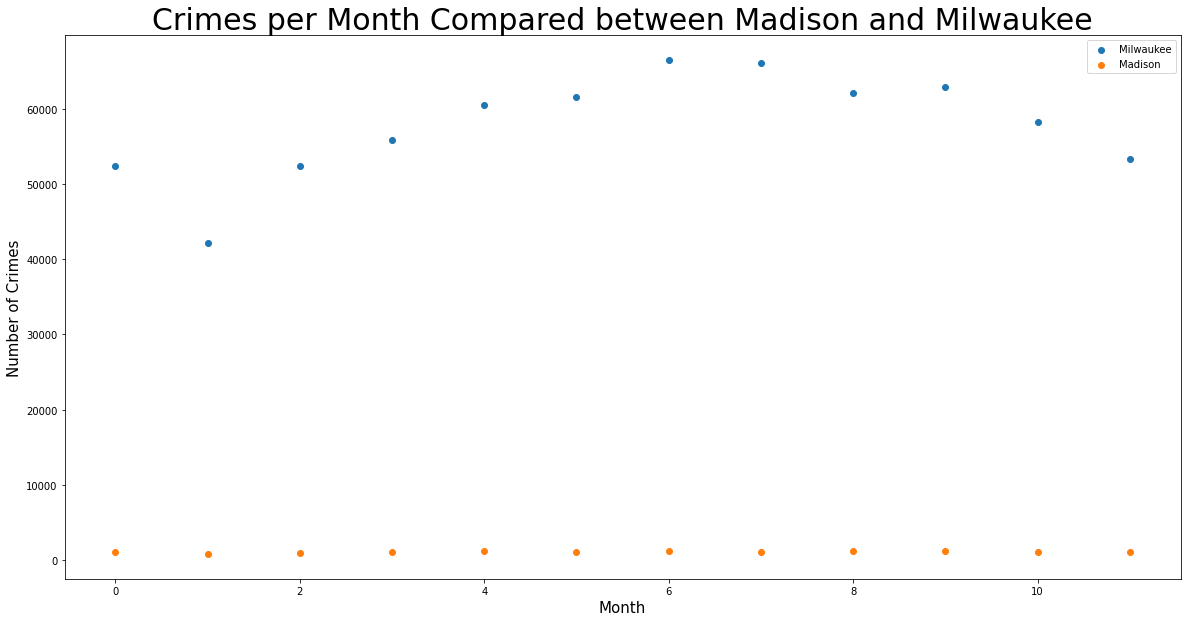

In [133]:
ax, fig = plt.subplots(figsize = (20,10))
plt.scatter(range(len(MKE)), MKE.values()) # scatter works better than bar as the difference is too great
plt.scatter(range(len(monthdict)),monthdict.values())
plt.xlabel("Month", size =15)
plt.ylabel("Number of Crimes", size =15)
plt.title("Crimes per Month Compared between Madison and Milwaukee", size = 30)
plt.legend(("Milwaukee","Madison"))